# Case Neoway - Regressor Baseline

In [1]:
import os, sys

sys.path.append('../')
os.chdir('../')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

from src.base.commons import load_yaml
from src.base.logger import logging
from src.global_variables import FEATURE_PARAMETERS_FILE, FILEPATHS_FILE, PARAMETERS_FILE, MODEL_CONFIG_FILE

from src.model import preprocessing, data


from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [3]:
%config IPCompleter.use_jedi=False

pd.options.display.max_columns = None

# Modelo Baseline

In [4]:
X_train, X_validation, y_train, y_validation = data.read_data_train_test()

In [5]:
def check_regressor(regressor):
    regressor.fit(X_train, y_train)

    y_validation_pred = regressor.predict(X_validation)
    print("R2 =",r2_score(y_validation, y_validation_pred))
    print("me =",mean_absolute_error(y_validation, y_validation_pred))
    print("rsme =",mean_squared_error(y_validation, y_validation_pred)**0.5)

    plt.close()
    plt.hist(y_validation, bins=100, alpha=0.4)
    plt.hist(y_validation_pred, bins=100, alpha=0.4)
    plt.show()

    return regressor

### Linear Regression - Baseline

R2 = 0.5517250603697592
me = 0.09392626004265305
rsme = 0.11635339102163764


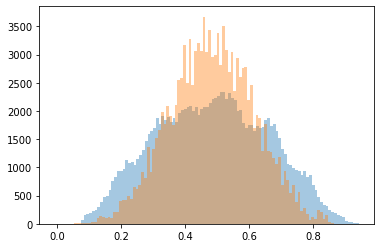

In [78]:
from sklearn.linear_model import LinearRegression
baseline_linreg = check_regressor(regressor=LinearRegression())

### XGBoost - Baseline

R2 = 0.8346216809404567
me = 0.05214587588552829
rsme = 0.07067179160199434


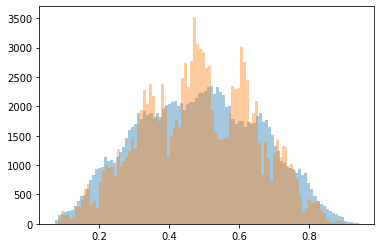

In [28]:
from xgboost import XGBRegressor
baseline_xgboost = check_regressor( XGBRegressor())

### LightGBM - Baseline

R2 = 0.8353595125663651
me = 0.052131736177185764
rsme = 0.07051396507131426


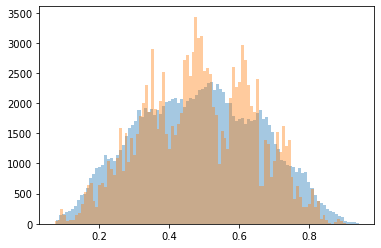

In [79]:
from lightgbm import LGBMRegressor
baseline_lgbm = check_regressor(regressor=LGBMRegressor())

R2 = 0.8351972874235267
me = 0.05202599482050478
rsme = 0.07054869626590425


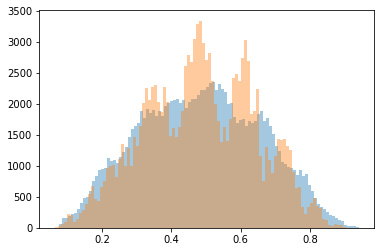

In [11]:
from catboost import CatBoostRegressor
baseline_cat = check_regressor(regressor=CatBoostRegressor(verbose=0))

R2 = 0.8342245857849093
me = 0.0519771981499649
rsme = 0.0707565868775665


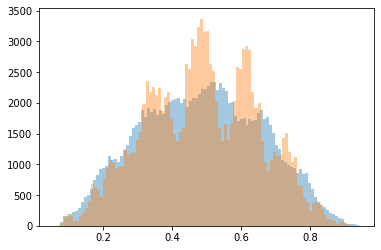

In [80]:
from sklearn.neural_network import MLPRegressor
baseline_mlp = check_regressor(regressor=MLPRegressor())

### SVR - Baseline

In [82]:
from sklearn.svm import SVR
baseline_svr = check_regressor(regressor=SVR())

### Random Forest - Baseline

In [ ]:
from sklearn.ensemble import RandomForestRegressor

baseline_rf = check_regressor(regressor=RandomForestRegressor())

### HistGradientBoostingRegressor - Baseline

R2 = 0.8352109610793951
me = 0.052108328757643575
rsme = 0.07054576949792257


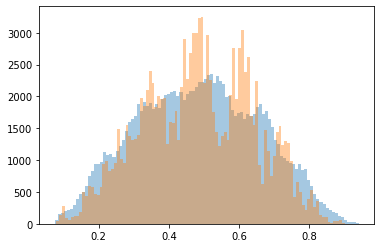

In [7]:
from sklearn.ensemble import HistGradientBoostingRegressor

baseline_hgbr = check_regressor(regressor=HistGradientBoostingRegressor())

### GradientBoostingRegressor - Baseline

R2 = 0.8163489318165122
me = 0.05650007312716412
rsme = 0.07447380511087257


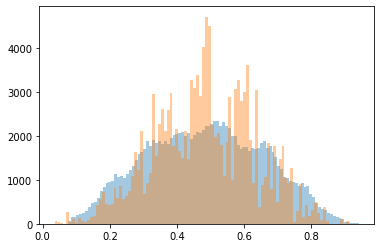

In [6]:
from sklearn.ensemble import GradientBoostingRegressor

baseline_gbr = check_regressor(regressor=GradientBoostingRegressor())

# Modelling

In [6]:
from cli.optimize import optimize_regressor
optimize_regressor()


2022-06-29 20:01:51,408 [INFO] FUNCTION: gaussian_process_optimization


Iteration No: 1 started. Evaluating function at provided point.


Cross validation: 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]




################################################################################
params: [0.1, 92, 19]
mae: 0.055133112437418016
--------------------------------------------------
Iteration No: 1 ended. Evaluation done at provided point.
Time taken: 0.8857
Function value obtained: 0.0551
Current minimum: 0.0551
Iteration No: 2 started. Evaluating function at random point.


Cross validation: 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]




################################################################################
params: [0.2012150827384654, 101, 18]
mae: 0.056286006753925186
--------------------------------------------------
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 1.5304
Function value obtained: 0.0563
Current minimum: 0.0551
Iteration No: 3 started. Evaluating function at random point.


Cross validation: 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]




################################################################################
params: [0.7188994821630164, 105, 11]
mae: 0.06604392190556524
--------------------------------------------------


2022-06-29 20:01:55,325 [INFO] Proposal parameters: {'learning_rate': 0.1, 'n_estimators': 92, 'max_depth': 19}
2022-06-29 20:01:55,326 [INFO] Set regressor with proposed parameters


Iteration No: 3 ended. Evaluation done at random point.
Time taken: 1.4674
Function value obtained: 0.0660
Current minimum: 0.0551


2022-06-29 20:02:05,090 [INFO] mae_proposed = 0.05
2022-06-29 20:02:05,090 [INFO] R2_proposed = 0.84
2022-06-29 20:02:05,094 [INFO] mae_current = 0.520
2022-06-29 20:02:05,097 [INFO] mae_proposal = 0.052
2022-06-29 20:02:05,101 [INFO] Optimization found a better model.
2022-06-29 20:02:05,102 [INFO] Update model with new parameters
2022-06-29 20:02:05,103 [INFO] Update model/lightgbm/config.json file


In [6]:
# from lightgbm import LGBMRegressor
# from src.base.commons import load_json, dump_json
# from src.model.regressor import *
# from src.optimizer.cross_validation import *
# from src.optimizer import gaussian_process_optimization
# from src.optimizer.space import eval_parametric_space_dimension
# from skopt.utils import use_named_args
# from skopt import gp_minimize
# from src.model.data import read_data_train_test

# model_config = load_yaml(MODEL_CONFIG_FILE)
# model_parameters = load_json(model_config["parametric_space_path"])

# hyper_param = {
#     hp["parameter"]: hp["estimate"] for hp in model_parameters["parametric_space"]
# }

# X_train, X_test, y_train, y_test = read_data_train_test()

# optimizer = gaussian_process_optimization(X_train, y_train, sample=10000)

# proposal_params = dict(zip(hyper_param.keys(), optimizer.x))

# logging.info(f"Proposal parameters: {proposal_params}")

# logging.info("Set regressor with proposed parameters")
# proposal_regessor = set_regressor(model_config["model"], **proposal_params)
# proposal_regessor.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0)
# y_test_pred = proposal_regessor.predict(X_test)
# mae_proposal = mean_absolute_error(y_test, y_test_pred)
# r2_proposal = r2_score(y_test, y_test_pred)

# logging.info("mae_proposed = {:.2f}".format(mae_proposal))
# logging.info("R2_proposed = {:.2f}".format(r2_proposal))

# mae_current = model_parameters["metric"]["value"]

# logging.info("mae_current = {:.3f}".format(mae_current))
# logging.info("mae_proposal = {:.3f}".format(mae_proposal))

# if mae_proposal < mae_current:

#     logging.info("Optimization found a better model.")
#     logging.info("Update model with new parameters")
#     logging.info("Update {} file".format(model_config["parametric_space_path"]))

#     for i, param in enumerate(model_parameters["parametric_space"]):
#         param.update({"estimate": optimizer.x[i]})

#     model_parameters["metric"].update({"value": mae_proposal})

#     dump_json(model_parameters, model_config["parametric_space_path"], indent=4)

# else:
#     logging.info(
#         "Optimization was not capable to find a better model. Keeping with the old model."
#     )

2022-06-29 19:43:21,834 [INFO] FUNCTION: gaussian_process_optimization


Iteration No: 1 started. Evaluating function at provided point.


Cross validation: 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]




################################################################################
params: [0.1, 92, 19]
mae: 0.056325814673894324
--------------------------------------------------
Iteration No: 1 ended. Evaluation done at provided point.
Time taken: 0.6485
Function value obtained: 0.0563
Current minimum: 0.0563
Iteration No: 2 started. Evaluating function at random point.


Cross validation: 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]




################################################################################
params: [0.6451186249923153, 114, 11]
mae: 0.06292774737024397
--------------------------------------------------
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 1.4345
Function value obtained: 0.0629
Current minimum: 0.0563
Iteration No: 3 started. Evaluating function at random point.


Cross validation: 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]




################################################################################
params: [0.16679022601134735, 92, 18]
mae: 0.05612504169311028
--------------------------------------------------


2022-06-29 19:43:24,921 [INFO] Proposal parameters: {'learning_rate': 0.16679022601134735, 'n_estimators': 92, 'max_depth': 18}
2022-06-29 19:43:24,922 [INFO] Set regressor with proposed parameters


Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.9848
Function value obtained: 0.0561
Current minimum: 0.0561


2022-06-29 19:43:30,523 [INFO] mae_proposed = 0.05
2022-06-29 19:43:30,525 [INFO] R2_proposed = 0.84
2022-06-29 19:43:30,527 [INFO] mae_current = 0.052
2022-06-29 19:43:30,529 [INFO] mae_proposal = 0.052
2022-06-29 19:43:30,530 [INFO] Optimization found a better model.
2022-06-29 19:43:30,531 [INFO] Update model with new parameters
2022-06-29 19:43:30,532 [INFO] Update model/lightgbm/config.json file


In [14]:
!pip install lightgbm==3.2.1

  Using cached lightgbm-3.2.1-py3-none-manylinux1_x86_64.whl (2.0 MB)
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 3.3.2
    Uninstalling lightgbm-3.3.2:
      Successfully uninstalled lightgbm-3.3.2


In [12]:
import lightgbm

lightgbm.__version__

'3.3.2'

In [77]:


space = [
    eval_parametric_space_dimension(d) for d in model_parameters["parametric_space"]
]

x0 = list(hyper_param.values())


@use_named_args(space)
def train_function(**params):

    estimator = set_regressor(model_config["model"], **params)

    cv_mae = cross_validate_score(
        X_train,
        y_train,
        estimator,
        scoring=mean_absolute_error,
        n_folds=model_config["opt_config"]["n_folds"],
        fit_params=model_config["fit_parameters"],
        sample = 1000
    )

    print(f"\n\n{80 * '#'}")
    print("params:", list(params.values()))
    print("mae:", cv_mae)
    print(f"{50 * '-'}")

    return cv_mae

res_gp = gp_minimize(
    train_function,
    space,
    x0=x0,
    y0=None,
    random_state=model_config["opt_config"]["random_state"],
    verbose=model_config["opt_config"]["verbose"],
    n_calls=model_config["opt_config"]["n_calls"],
    n_random_starts=model_config["opt_config"]["n_random_starts"],
)

model_config["fit_parameters"]["eval_set"] = None

Iteration No: 1 started. Evaluating function at provided point.


Cross validation: 100%|██████████| 2/2 [00:00<00:00,  5.86it/s]




################################################################################
params: [0.1, 92, 19]
mae: 0.06387162791313594
--------------------------------------------------
Iteration No: 1 ended. Evaluation done at provided point.
Time taken: 0.4776
Function value obtained: 0.0639
Current minimum: 0.0639
Iteration No: 2 started. Evaluating function at random point.


Cross validation: 100%|██████████| 2/2 [00:00<00:00,  5.68it/s]




################################################################################
params: [0.17187298634235004, 92, 18]
mae: 0.06845327309164034
--------------------------------------------------
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.8162
Function value obtained: 0.0685
Current minimum: 0.0639
Iteration No: 3 started. Evaluating function at random point.


Cross validation: 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]




################################################################################
params: [0.5455623771461363, 102, 16]
mae: 0.07634522770277824
--------------------------------------------------
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 1.1075
Function value obtained: 0.0763
Current minimum: 0.0639


In [76]:
train_function(x0)

Cross validation: 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]


In [79]:
from src.base.commons import load_json, load_yaml
from src.base.logger import logging
from src.model.regressor import set_regressor
from src.optimizer.space import eval_parametric_space_dimension
from skopt import gp_minimize
from skopt.utils import use_named_args
from src.optimizer.cross_validation import cross_validate_score
from sklearn.metrics import r2_score, mean_absolute_error
from src.global_variables import (
    FEATURE_PARAMETERS_FILE,
    FILEPATHS_FILE,
    PARAMETERS_FILE,
    MODEL_CONFIG_FILE,
)


def gaussian_process_optimization(X_train, y_train, sample=None):

    logging.info("FUNCTION: gaussian_process_optimization")

    model_config = load_yaml(MODEL_CONFIG_FILE)

    model_parameters = load_json(model_config["parametric_space_path"])

    hyper_param = {
        hp["parameter"]: hp["best_value"] for hp in model_parameters["parametric_space"]
    }

    space = [
        eval_parametric_space_dimension(d) for d in model_parameters["parametric_space"]
    ]

    x0 = list(hyper_param.values())

    @use_named_args(space)
    def train_function(**params):

        estimator = set_regressor(model_config["model"], **params)

        cv_mae = cross_validate_score(
            X_train,
            y_train,
            estimator,
            scoring=mean_absolute_error,
            n_folds=model_config["opt_config"]["n_folds"],
            fit_params=model_config["fit_parameters"],
            sample=sample,
        )

        print(f"\n\n{80 * '#'}")
        print("params:", list(params.values()))
        print("mae:", cv_mae)
        print(f"{50 * '-'}")

        return cv_mae

    res_gp = gp_minimize(
        train_function,
        space,
        x0=x0,
        y0=None,
        random_state=model_config["opt_config"]["random_state"],
        verbose=model_config["opt_config"]["verbose"],
        n_calls=model_config["opt_config"]["n_calls"],
        n_random_starts=model_config["opt_config"]["n_random_starts"],
    )

    model_config["fit_parameters"]["eval_set"] = None

    return res_gp

In [62]:
X = X_train
y = y_train
estimator =  set_regressor(model_config["model"])
scoring = mean_absolute_error
verbose=1
n_folds=5
random_state=42
fit_params={}
minimize=True
sample = 1000

In [65]:

scores = []

if sample is not None:
    data = X.assign(y=y.values).sample(sample)
else:
    data = X.assign(y=y.values)
    
data = data.reset_index(drop=True)

data["fold"] = generate_folds(data, n_folds=n_folds, random_state=random_state)

In [66]:
data

,V1_estuda,V1_trabalha,V1_pratica_esportes,V1_tem_filhos,grau_familia,proximidade_visita_frequente,proximidade_visita_casual,proximidade_visita_rara,V1_geracao_silent,V1_geracao_baby_boomer,V1_geracao_gen_x,V1_geracao_gen_y,V1_geracao_gen_z,V2_geracao_silent,V2_geracao_baby_boomer,V2_geracao_gen_x,V2_geracao_gen_y,V2_geracao_gen_z,V1_IMC_normal,V1_IMC_sobrepeso,V1_IMC_obeso_1,V1_IMC_obeso_2,V1_IMC_obeso_3,V2_IMC_normal,V2_IMC_sobrepeso,V2_IMC_obeso_1,V2_IMC_obeso_2,V2_IMC_obeso_3,V1_estado_civil_caso_ou_divorciado,V1_estado_civil_solteiro,V1_transporte_mais_utilizado_publico,V1_transporte_mais_utilizado_particular,V2_transporte_mais_utilizado_publico,V2_transporte_mais_utilizado_particular,y,fold
0,0.0,1.0,1.0,0.0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0.507221,1
1,1.0,1.0,1.0,0.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0.602620,4
2,0.0,1.0,0.0,0.0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0.164850,1
3,1.0,1.0,0.0,1.0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0.223630,1
4,1.0,0.0,1.0,1.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0.806207,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,1.0,0.0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0.701684,0
996,0.0,1.0,0.0,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0.136147,4
997,1.0,0.0,1.0,0.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0.518815,1
998,1.0,0.0,1.0,1.0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0.730466,0


In [20]:

scores = []

data = X.reset_index(drop=True).assign(y=y.values)

data["fold"] = generate_folds(data, n_folds=n_folds, random_state=random_state)

iterator = (
    range(n_folds) if verbose < 1 else tqdm(range(n_folds), desc="Cross validation")
)

Cross validation:   0%|          | 0/5 [01:41<?, ?it/s]


In [21]:
fold = 0

# Separando os dados de treinamento para essa fold
train_data = data[data["fold"] != fold].copy()

# Separando os dados de teste para esse fold
test_data = data[data["fold"] == fold].copy()

X_1 = train_data.drop(columns=["fold", "y"]).values

X_2 = test_data.drop(columns=["fold", "y"]).values

y_1 = train_data["y"].values

y_2 = test_data["y"].values

# if estimator.__class__ in [
#     xgboost.sklearn.XGBRegressor,
#     xgboost.sklearn.XGBClassifier,
# ]:
#     fit_params["eval_set"] = [(X_2, y_2)]

# try:
#     estimator.fit(X_1, y_1, **fit_params)
# except:
#     estimator.fit(X_1, y_1, **fit_params)

# scores.append(scoring(y_2, estimator.predict(X_2)))

In [22]:
X_2

array([[1., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 1., 0.]])

In [24]:
import xgboost
import lightgbm
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import KFold, StratifiedKFold


def cross_validate_score(
    X,
    y,
    estimator,
    scoring,
    verbose=1,
    n_folds=5,
    random_state=42,
    fit_params={},
    minimize=True,
):

    scores = []

    data = X.assign(y=y)

    data["fold"] = generate_folds(data, n_folds=n_folds, random_state=random_state)

    iterator = (
        range(n_folds) if verbose < 1 else tqdm(range(n_folds), desc="Cross validation")
    )

    for fold in iterator:

        # Separando os dados de treinamento para essa fold
        train_data = data[data["fold"] != fold].copy()

        # Separando os dados de teste para esse fold
        test_data = data[data["fold"] == fold].copy()

        X_1 = train_data.drop(columns=["fold", "y"]).values

        X_2 = test_data.drop(columns=["fold", "y"]).values

        y_1 = train_data["y"].values

        y_2 = test_data["y"].values

        if estimator.__class__ in [
            xgboost.sklearn.XGBRegressor,
            xgboost.sklearn.XGBClassifier,
            lightgbm.sklearn.LGBMRegressor,
            lightgbm.sklearn.LGBMClassifier,
        ]:
            fit_params["eval_set"] = [(X_2, y_2)]

        try:
            estimator.fit(X_1, y_1, **fit_params)
        except:
            estimator.fit(X_1, y_1, **fit_params)

        scores.append(scoring(y_2, estimator.predict(X_2)))

    if minimize:
        avg_score = np.mean(scores)
    else:
        avg_score = -np.mean(scores)

    return avg_score


def generate_folds(train, n_folds=5, shuffle=True, random_state=42):

    temp = train.copy().reset_index(drop=True)

    # Instaciando o estritificador
    kf = KFold(n_splits=n_folds, shuffle=shuffle, random_state=random_state)

    # Gerando os index com os folds
    stratified_folds = list(kf.split(X=temp.drop(columns="y"), y=temp["y"]))

    for fold_index in range(n_folds):

        train_index, validation_index = stratified_folds[fold_index]

        temp.loc[temp[temp.index.isin(validation_index)].index, "fold"] = fold_index

    return temp["fold"].astype(int)


def generate_stratified_folds(train, n_folds=5, shuffle=True, random_state=42):

    temp = train.copy().reset_index(drop=True)

    # Instaciando o estritificador
    skf = StratifiedKFold(n_splits=n_folds, shuffle=shuffle, random_state=random_state)

    # Gerando os index com os folds
    stratified_folds = list(skf.split(X=temp.drop(columns="y"), y=temp["y"]))

    for fold_index in range(n_folds):

        train_index, validation_index = stratified_folds[fold_index]

        temp.loc[temp[temp.index.isin(validation_index)].index, "fold"] = fold_index

    return temp["fold"].astype(int)

In [20]:
from src.base.commons import dump_pickle


filepaths = load_yaml(filename=FILEPATHS_FILE)
model_config = load_yaml(MODEL_CONFIG_FILE)

regressor_path = filepaths["model_regressor_path"].format(model=model_config["model"])



In [21]:
from src.model.regressor import get_regressor

model = get_regressor()

In [22]:
model

LGBMRegressor()

In [12]:
optimizer = gaussian_process_optimization(X_train, y_train)

{'learning_rate': 0.1,
 'n_estimators': 92,
 'max_depth': 19,
 'boosting_type': 'gbdt'}